In [1]:
%matplotlib inline
%load_ext dotenv
%dotenv env.sh
import pandas as pd
import numpy as np
import plotnine as pn
import os
import os.path as osp
from cytokit import config as ck_config
from cytokit.function import data as ck_data

In [2]:
df = pd.read_csv('experiments.csv')
df['output_dir'] = df.apply(lambda r: osp.join(os.environ['EXP_GROUP_OUT_DIR'], r['name'], 'v00'), axis=1)
df['config'] = df.apply(lambda r: ck_config.load(osp.join(r['output_dir'], 'config')), axis=1)
df.head()

,name,conf,dir,grid,n_ch,n_tiles,n_z,cond,z_pitch,output_dir,config
0,sta-00.125-20um-s-XY01,experiment.yaml,0125uMsta-20um-grids,XY01,3,27,8,sta-00.125-20um-s,200,/lab/data/spheroid/20190703-sta-titration/outp...,{'analysis': [{'aggregate_cytometry_statistics...
1,sta-00.125-20um-s-XY02,experiment.yaml,0125uMsta-20um-grids,XY02,3,27,7,sta-00.125-20um-s,200,/lab/data/spheroid/20190703-sta-titration/outp...,{'analysis': [{'aggregate_cytometry_statistics...
2,sta-00.125-20um-s-XY03,experiment.yaml,0125uMsta-20um-grids,XY03,3,27,9,sta-00.125-20um-s,200,/lab/data/spheroid/20190703-sta-titration/outp...,{'analysis': [{'aggregate_cytometry_statistics...
3,sta-00.250-20um-s-XY01,experiment.yaml,025uMsta-20um-grids,XY01,3,27,8,sta-00.250-20um-s,200,/lab/data/spheroid/20190703-sta-titration/outp...,{'analysis': [{'aggregate_cytometry_statistics...
4,sta-00.250-20um-s-XY02,experiment.yaml,025uMsta-20um-grids,XY02,3,27,7,sta-00.250-20um-s,200,/lab/data/spheroid/20190703-sta-titration/outp...,{'analysis': [{'aggregate_cytometry_statistics...


In [3]:
dfa = pd.concat([
    ck_data.get_cytometry_data(r['output_dir'], r['config']).assign(**r[['name', 'grid', 'cond']].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfa.head()

,cb:on_border,ci:BF:mean,ci:HOECHST:mean,ci:SYTOX:mean,cm:circularity,cm:diameter,cm:diameter_vx,cm:perimeter,cm:size,cm:size_vx,...,region_index,rid,rx,ry,tile_index,tile_x,tile_y,x,y,z
0,1,48123.486331,4950.094964,1457.692086,0.786831,11.227878,29.747294,105.355339,99.011412,695,...,0,0,698.119424,11.158273,0,0,0,698.119424,11.158273,6
1,0,50543.491121,6867.684630,3266.533374,0.851991,17.210694,45.598248,155.195959,232.641203,1633,...,0,1,1181.793019,46.503980,0,0,0,1181.793019,46.503980,6
2,0,44129.723183,3145.604383,1575.648212,0.924317,12.540499,33.224971,108.568542,123.514956,867,...,0,2,1084.094579,41.424452,0,0,0,1084.094579,41.424452,6
3,0,44389.122324,2331.458716,1295.407747,0.947185,13.339507,35.341873,114.083261,139.755677,981,...,0,3,423.676860,41.785933,0,0,0,423.676860,41.785933,6
4,0,48547.007052,11447.565585,3532.359661,0.937280,11.340401,30.045413,97.497475,101.005887,709,...,0,4,911.473907,54.705219,0,0,0,911.473907,54.705219,6


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49238 entries, 0 to 85
Data columns (total 36 columns):
cb:on_border       49238 non-null object
ci:BF:mean         49238 non-null float64
ci:HOECHST:mean    49238 non-null float64
ci:SYTOX:mean      49238 non-null float64
cm:circularity     49238 non-null float64
cm:diameter        49238 non-null float64
cm:diameter_vx     49238 non-null float64
cm:perimeter       49238 non-null float64
cm:size            49238 non-null float64
cm:size_vx         49238 non-null object
cm:solidity        49238 non-null float64
exp:cond           49238 non-null object
exp:grid           49238 non-null object
exp:name           49238 non-null object
id                 49238 non-null object
nb:on_border       49238 non-null object
ni:BF:mean         49238 non-null float64
ni:HOECHST:mean    49238 non-null float64
ni:SYTOX:mean      49238 non-null float64
nm:circularity     49238 non-null float64
nm:diameter        49238 non-null float64
nm:diameter_vx     

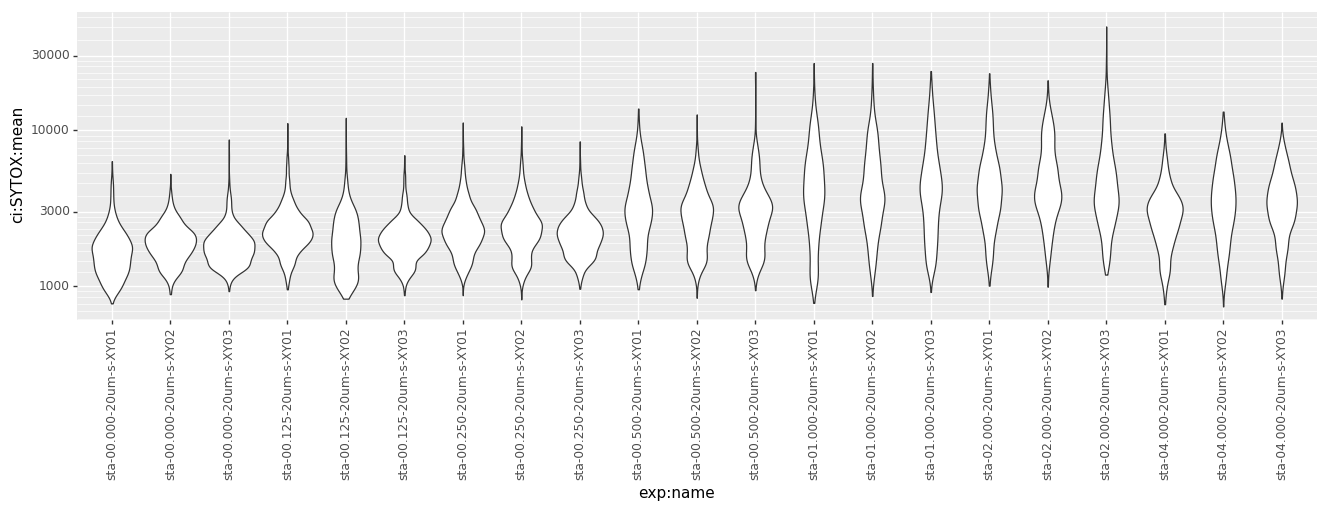

<ggplot: (-9223363297986821032)>

In [5]:
(
    pn.ggplot(
        dfa,
        pn.aes(x='exp:name', y='ci:SYTOX:mean')
    ) + 
    pn.geom_violin() + 
    pn.scale_y_log10() +
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 4))
)

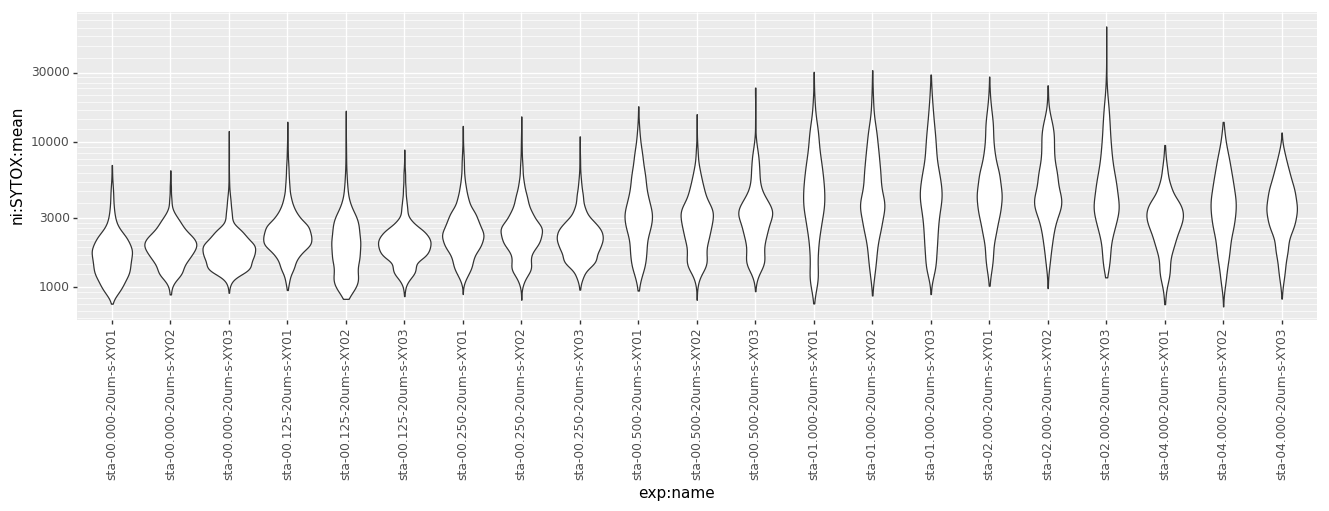

<ggplot: (8738865721250)>

In [6]:
(
    pn.ggplot(
        dfa,
        pn.aes(x='exp:name', y='ni:SYTOX:mean')
    ) + 
    pn.geom_violin() + 
    pn.scale_y_log10() +
    pn.theme(axis_text_x=pn.element_text(rotation=90), figure_size=(16, 4))
)

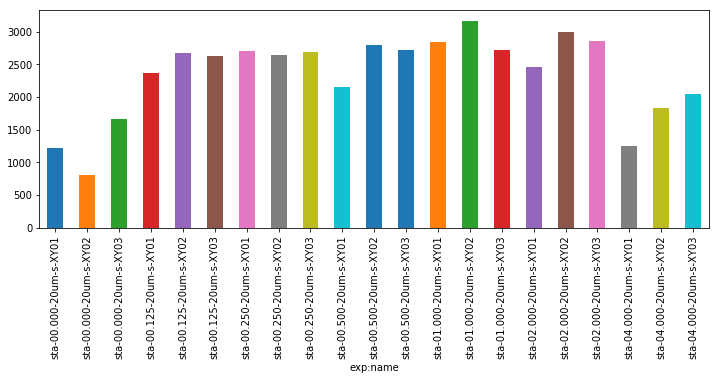

In [21]:
dfa.groupby('exp:name').size().plot(kind='bar', figsize=(12, 4))

In [13]:
def plot_reps(df, col, col_title=None):
    df1 = df.groupby('exp:cond')[col].mean().rename('value').reset_index()
    df2 = df.groupby(['exp:cond', 'exp:name', 'exp:grid'])[col].mean().rename('value').reset_index()
    return (
        pn.ggplot(
            df2,
            pn.aes(x='exp:cond', y='value', color='exp:grid')
        ) + 
        pn.geom_jitter(random_state=2, width=.3, height=0, size=3) +
        pn.geom_point(data=df1, mapping=pn.aes(x='exp:cond', y='value'), color='black', stat='identity') + 
        pn.geom_line(data=df1, mapping=pn.aes(x='exp:cond', y='value', group=1), color='black', alpha=.2) + 
        pn.labs(
            x='Treatment', y=col_title or col, 
            title='STA Titration Results',
            color='Grid'
        ) +
        pn.theme_bw() + 
        pn.theme(figure_size=(12, 4), axis_text_x=pn.element_text(rotation=45, hjust=1))
    )

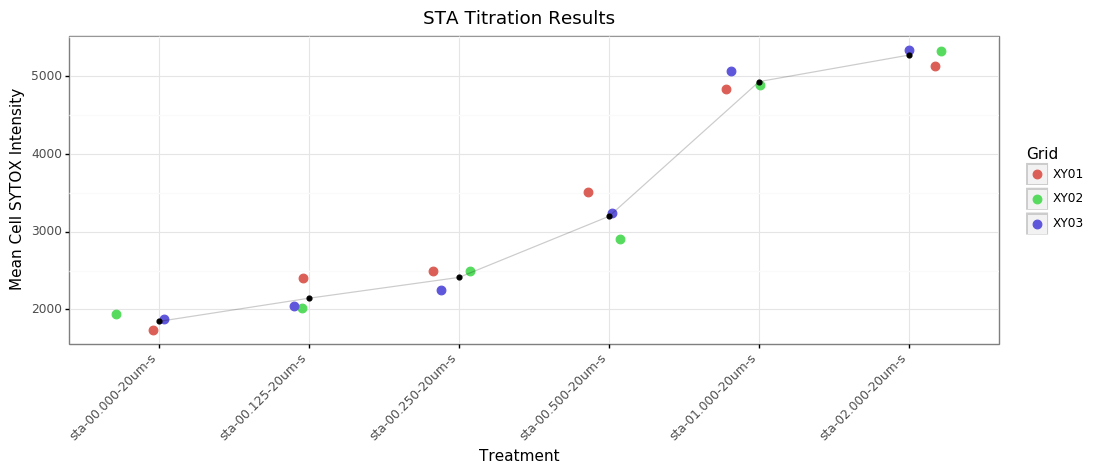

<ggplot: (8738865407699)>

In [14]:
#plot_reps(dfa)
plot_reps(dfa.pipe(lambda df: df[df['exp:cond'] != 'sta-04.000-20um-s']), 'ci:SYTOX:mean', 'Mean Cell SYTOX Intensity')

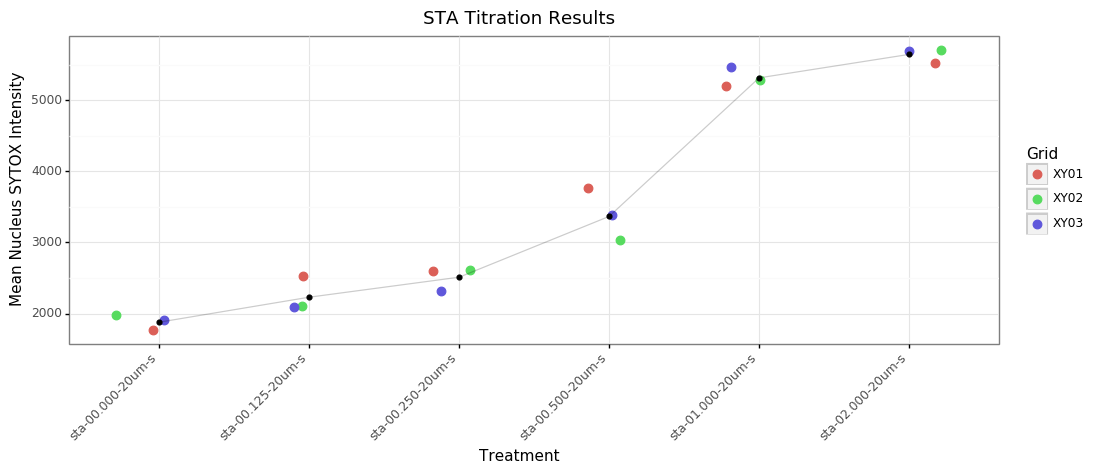

<ggplot: (8738865582600)>

In [15]:
#plot_reps(dfa)
plot_reps(dfa.pipe(lambda df: df[df['exp:cond'] != 'sta-04.000-20um-s']), 'ni:SYTOX:mean', 'Mean Nucleus SYTOX Intensity')

### CellProfiler Results

In [102]:
dfcp = pd.concat([
    pd.read_csv(osp.join(r['output_dir'], 'cytometry', 'cellprofiler', 'results', 'Table_Cell.txt'), sep='\t')
    .assign(**r[['name', 'grid', 'cond']].add_prefix('exp:').to_dict())
    for i, r in df.iterrows()
])
dfcp.head()

,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_ImgType,Metadata_Region,Metadata_Series,Metadata_TileX,Metadata_TileY,AreaShape_Area,...,Neighbors_FirstClosestDistance_Expanded,Neighbors_FirstClosestObjectNumber_Expanded,Neighbors_NumberOfNeighbors_Expanded,Neighbors_PercentTouching_Expanded,Neighbors_SecondClosestDistance_Expanded,Neighbors_SecondClosestObjectNumber_Expanded,Number_Object_Number,exp:cond,exp:grid,exp:name
0,1,1,NaN,0,NaN,1,0,1,1,695,...,167.499240,14,4.0,66.578249,200.254334,17,1,sta-00.125-20um-s,XY01,sta-00.125-20um-s-XY01
1,1,2,NaN,0,NaN,1,0,1,1,1633,...,83.960832,6,4.0,69.966443,92.204851,7,2,sta-00.125-20um-s,XY01,sta-00.125-20um-s-XY01
2,1,3,NaN,0,NaN,1,0,1,1,867,...,45.773705,6,3.0,74.768089,97.830398,2,3,sta-00.125-20um-s,XY01,sta-00.125-20um-s-XY01
3,1,4,NaN,0,NaN,1,0,1,1,981,...,82.797781,8,5.0,56.724267,120.214155,11,4,sta-00.125-20um-s,XY01,sta-00.125-20um-s-XY01
4,1,5,NaN,0,NaN,1,0,1,1,709,...,173.130804,3,5.0,75.609756,186.467464,20,5,sta-00.125-20um-s,XY01,sta-00.125-20um-s-XY01


In [103]:
pd.set_option('display.max_info_columns', 100000)
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49238 entries, 0 to 1662
Data columns (total 134 columns):
ImageNumber                                     49238 non-null object
ObjectNumber                                    49238 non-null object
Metadata_FileLocation                           0 non-null float64
Metadata_Frame                                  49238 non-null object
Metadata_ImgType                                0 non-null float64
Metadata_Region                                 49238 non-null object
Metadata_Series                                 49238 non-null object
Metadata_TileX                                  49238 non-null object
Metadata_TileY                                  49238 non-null object
AreaShape_Area                                  49238 non-null object
AreaShape_Center_X                              49238 non-null float64
AreaShape_Center_Y                              49238 non-null float64
AreaShape_Center_Z                              49238 n

In [120]:
# Validate that the number of cells and their ids are equivalent from both quantification methods
assert len(dfa) == len(dfcp)
assert (dfa.groupby('exp:name').size() == dfcp.groupby('exp:name').size()).all()
assert (dfa.groupby('exp:name')['id'].max() == dfcp.groupby('exp:name')['ObjectNumber'].max()).all()
assert (dfa.groupby('exp:name')['id'].nunique() == dfcp.groupby('exp:name')['ObjectNumber'].nunique()).all()

# Verify that the correlation between intensity measurements is perfect
for c in ['SYTOX', 'HOECHST', 'BF']:
    c1 = 'ci:' + c + ':mean'
    c2 = 'Intensity_MeanIntensity_' + c
    assert dfa.groupby('exp:name')[c1].mean().corr(dfcp.groupby('exp:name')[c2].mean()) == 1

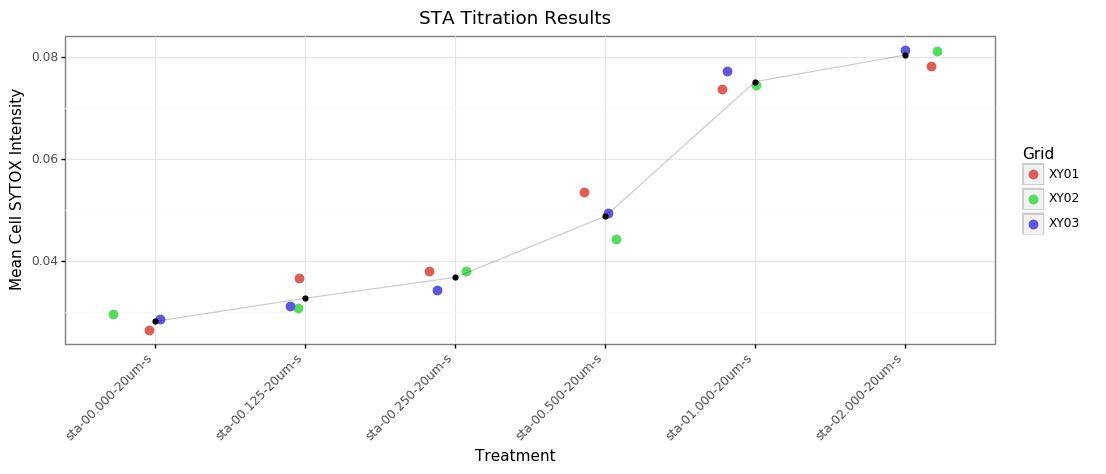

<ggplot: (-9223363298134217584)>

In [122]:
plot_reps(
    dfcp.pipe(lambda df: df[df['exp:cond'] != 'sta-04.000-20um-s']), 
    'Intensity_MeanIntensity_SYTOX', 'Mean Cell SYTOX Intensity'
)